In [1]:
import pandas as pd

In [2]:
cd ~/kmer-hashing/sourmash/maca/facs/

/home/ubuntu/kmer-hashing/sourmash/maca/facs


Found failed samples this way (outside on the terminal)

```
aws s3 ls s3://olgabot-maca/facs/sourmash/ | cut -f 9 -d ' ' | cut -f 1 -d'.' > samples_with_signatures.txt
ls -lh | grep --fixed-strings --file samples_with_signatures.txt -v | grep log > failed_samples.txt
```

read the logs with:
```
ls  | grep --fixed-strings --file samples_with_signatures.txt -v | grep log | xargs tail | less
```

In [5]:
! head failed_samples.txt

-rw------- 1 ubuntu ubuntu 4.6K Jun 12 06:14 log.A10-B002010-3_39_F-1-1_S218
-rw------- 1 ubuntu ubuntu 1.8K Jun 12 16:53 log.A10-B002421-3_39_F-1-1_S193
-rw------- 1 ubuntu ubuntu 1.8K Jun 12 16:54 log.A10-B002429-3_38_F-1-1_S39
-rw------- 1 ubuntu ubuntu 3.3K Jun 12 05:01 log.A10-B002435-3_39_F-1-1_S249
-rw------- 1 ubuntu ubuntu 3.4K Jun 12 16:54 log.A10-D041894-3_9_M-1-1_S99
-rw------- 1 ubuntu ubuntu 3.4K Jun 12 16:53 log.A10-MAA000439-3_10_M-1-1_S45
-rw------- 1 ubuntu ubuntu 1.4K Jun 12 06:34 log.A10-MAA000572-3_8_M-1-1_S250
-rw------- 1 ubuntu ubuntu 3.4K Jun 12 16:53 log.A10-MAA000595-3_9_M-1-1_S288
-rw------- 1 ubuntu ubuntu 4.6K Jun 12 00:45 log.A10-MAA000839-3_11_M-1-1_S186
-rw------- 1 ubuntu ubuntu 3.4K Jun 12 16:54 log.A10-MAA001887-3_39_F-1-1_S174


In [ ]:
! head failed_samples.txt

In [32]:
! tail log.A10-B002010-3_39_F-1-1_S218

	    {{signature}} =
	        . sha256:268a126b191343e2e56969da8f99588fd34b3c1e66ed6813725b6b309d38af15 26.9KiB
	profile:
	    cpu mean=1.0 max=1.4
	    mem mean=14.5MiB max=14.6MiB
	    disk mean=0B max=0B
	    tmp mean=0B max=0B
2018/06/12 06:14:44 retain 0s: keepalive 0a105711eedbf376 0s: operation not supported: zombie alloc
2018/06/12 06:14:44 marking run done after nonrecoverable error put 0a105711eedbf376 sha256:d73544f957060c3c72bb25088ea73434d5e06aa0a07ebf19e42dee3bbfeaf06f execconfig extern url s3://olgabot-maca/facs/sourmash/A10-B002010-3_39_F-1-1_S218.signature resources {}: operation not supported: zombie alloc
2018/06/12 06:14:44 run A10-B002010-3_39_F-1-1_S218: state: done error put 0a105711eedbf376 sha256:d73544f957060c3c72bb25088ea73434d5e06aa0a07ebf19e42dee3bbfeaf06f execconfig extern url s3://olgabot-maca/facs/sourmash/A10-B002010-3_39_F-1-1_S218.signature resources {}: operation not supported: zombie alloc


In [4]:
samples = pd.read_csv('samples.csv', index_col=0)
print(samples.shape)
samples.head()

(54912, 4)


,read1,read2,sample_id,output_signature
id,,,,
A1-B000126-3_39_F-1-1_S289,s3://czbiohub-maca/remux_data/170925_A00111_00...,s3://czbiohub-maca/remux_data/170925_A00111_00...,A1-B000126-3_39_F-1-1_S289,s3://olgabot-maca/facs/sourmash/A1-B000126-3_3...
A1-B000127-3_38_F-1-1_S1,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A1-B000127-3_38_F-1-1_S1,s3://olgabot-maca/facs/sourmash/A1-B000127-3_3...
A1-B000167-3_56_F-1-1_S228,s3://czbiohub-maca/remux_data/170925_A00111_00...,s3://czbiohub-maca/remux_data/170925_A00111_00...,A1-B000167-3_56_F-1-1_S228,s3://olgabot-maca/facs/sourmash/A1-B000167-3_5...
A1-B000168-3_57_F-1-1_S177,s3://czbiohub-maca/remux_data/170925_A00111_00...,s3://czbiohub-maca/remux_data/170925_A00111_00...,A1-B000168-3_57_F-1-1_S177,s3://olgabot-maca/facs/sourmash/A1-B000168-3_5...
A1-B000412-3_56_F-1-1_S110,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A1-B000412-3_56_F-1-1_S110,s3://olgabot-maca/facs/sourmash/A1-B000412-3_5...


In [9]:
failed_samples_logs = pd.read_table('failed_samples.txt', sep='\s+', header=None)
failed_samples_logs['id'] = failed_samples_logs[8].str.split('.').str[-1]
print(failed_samples_logs.shape)
failed_samples_logs.head()

(3466, 10)


,0,1,2,3,4,5,6,7,8,id
0,-rw-------,1,ubuntu,ubuntu,4.6K,Jun,12,06:14,log.A10-B002010-3_39_F-1-1_S218,A10-B002010-3_39_F-1-1_S218
1,-rw-------,1,ubuntu,ubuntu,1.8K,Jun,12,16:53,log.A10-B002421-3_39_F-1-1_S193,A10-B002421-3_39_F-1-1_S193
2,-rw-------,1,ubuntu,ubuntu,1.8K,Jun,12,16:54,log.A10-B002429-3_38_F-1-1_S39,A10-B002429-3_38_F-1-1_S39
3,-rw-------,1,ubuntu,ubuntu,3.3K,Jun,12,05:01,log.A10-B002435-3_39_F-1-1_S249,A10-B002435-3_39_F-1-1_S249
4,-rw-------,1,ubuntu,ubuntu,3.4K,Jun,12,16:54,log.A10-D041894-3_9_M-1-1_S99,A10-D041894-3_9_M-1-1_S99


In [10]:
samples_failed = samples.loc[failed_samples_logs['id']]
print(samples_failed.shape)
samples_failed.head()

(3466, 4)


,read1,read2,sample_id,output_signature
id,,,,
A10-B002010-3_39_F-1-1_S218,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A10-B002010-3_39_F-1-1_S218,s3://olgabot-maca/facs/sourmash/A10-B002010-3_...
A10-B002421-3_39_F-1-1_S193,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A10-B002421-3_39_F-1-1_S193,s3://olgabot-maca/facs/sourmash/A10-B002421-3_...
A10-B002429-3_38_F-1-1_S39,s3://czbiohub-maca/remux_data/170928_A00111_00...,s3://czbiohub-maca/remux_data/170928_A00111_00...,A10-B002429-3_38_F-1-1_S39,s3://olgabot-maca/facs/sourmash/A10-B002429-3_...
A10-B002435-3_39_F-1-1_S249,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A10-B002435-3_39_F-1-1_S249,s3://olgabot-maca/facs/sourmash/A10-B002435-3_...
A10-D041894-3_9_M-1-1_S99,s3://czbiohub-maca/remux_data/170918_A00111_00...,s3://czbiohub-maca/remux_data/170918_A00111_00...,A10-D041894-3_9_M-1-1_S99,s3://olgabot-maca/facs/sourmash/A10-D041894-3_...


In [11]:
pd.options.display.max_colwidth = 500

In [12]:
samples_failed.head()

,read1,read2,sample_id,output_signature
id,,,,
A10-B002010-3_39_F-1-1_S218,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A10-B002010-3_39_F-1-1_S218/A10-B002010-3_39_F-1-1_S218_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A10-B002010-3_39_F-1-1_S218/A10-B002010-3_39_F-1-1_S218_R2_001.fastq.gz,A10-B002010-3_39_F-1-1_S218,s3://olgabot-maca/facs/sourmash/A10-B002010-3_39_F-1-1_S218.signature
A10-B002421-3_39_F-1-1_S193,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A10-B002421-3_39_F-1-1_S193/A10-B002421-3_39_F-1-1_S193_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A10-B002421-3_39_F-1-1_S193/A10-B002421-3_39_F-1-1_S193_R2_001.fastq.gz,A10-B002421-3_39_F-1-1_S193,s3://olgabot-maca/facs/sourmash/A10-B002421-3_39_F-1-1_S193.signature
A10-B002429-3_38_F-1-1_S39,s3://czbiohub-maca/remux_data/170928_A00111_0068_AH3YKKDMXX/rawdata/A10-B002429-3_38_F-1-1_S39/A10-B002429-3_38_F-1-1_S39_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170928_A00111_0068_AH3YKKDMXX/rawdata/A10-B002429-3_38_F-1-1_S39/A10-B002429-3_38_F-1-1_S39_R2_001.fastq.gz,A10-B002429-3_38_F-1-1_S39,s3://olgabot-maca/facs/sourmash/A10-B002429-3_38_F-1-1_S39.signature
A10-B002435-3_39_F-1-1_S249,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A10-B002435-3_39_F-1-1_S249/A10-B002435-3_39_F-1-1_S249_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A10-B002435-3_39_F-1-1_S249/A10-B002435-3_39_F-1-1_S249_R2_001.fastq.gz,A10-B002435-3_39_F-1-1_S249,s3://olgabot-maca/facs/sourmash/A10-B002435-3_39_F-1-1_S249.signature
A10-D041894-3_9_M-1-1_S99,s3://czbiohub-maca/remux_data/170918_A00111_0059_BH3G22DMXX/rawdata/A10-D041894-3_9_M-1-1_S99/A10-D041894-3_9_M-1-1_S99_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170918_A00111_0059_BH3G22DMXX/rawdata/A10-D041894-3_9_M-1-1_S99/A10-D041894-3_9_M-1-1_S99_R2_001.fastq.gz,A10-D041894-3_9_M-1-1_S99,s3://olgabot-maca/facs/sourmash/A10-D041894-3_9_M-1-1_S99.signature


In [16]:
aws_fastq_bytes = pd.read_table('/mnt/data/maca/facs/aws_maca_remux_bytes_fastq.txt', sep='\s+', 
                                header=None, names=['date', 'time', 'filesize', 'suffix'])
print(aws_fastq_bytes.shape)
aws_fastq_bytes.head()

(263160, 4)


,date,time,filesize,suffix
0,2017-10-31,19:17:18,52570660,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041911-3_8_M-1-1_S128/A1-D041911-3_8_M-1-1_S128_R1_001.fastq.gz
1,2017-10-31,19:17:18,55481347,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041911-3_8_M-1-1_S128/A1-D041911-3_8_M-1-1_S128_R2_001.fastq.gz
2,2017-10-31,19:14:53,53806,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041912-3_8_M-1-1_S1/A1-D041912-3_8_M-1-1_S1_R1_001.fastq.gz
3,2017-10-31,19:14:53,54967,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041912-3_8_M-1-1_S1/A1-D041912-3_8_M-1-1_S1_R2_001.fastq.gz
4,2017-10-31,19:14:53,36204,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041914-3_8_M-1-1_S269/A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz


In [17]:
aws_fastq_bytes['sample_id'] = aws_fastq_bytes['suffix'].str.split('/').str[-2]
aws_fastq_bytes['read'] = aws_fastq_bytes['suffix'].str.extract('_(R[12])_')
aws_fastq_bytes.head()

,date,time,filesize,suffix,sample_id,read
0,2017-10-31,19:17:18,52570660,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041911-3_8_M-1-1_S128/A1-D041911-3_8_M-1-1_S128_R1_001.fastq.gz,A1-D041911-3_8_M-1-1_S128,R1
1,2017-10-31,19:17:18,55481347,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041911-3_8_M-1-1_S128/A1-D041911-3_8_M-1-1_S128_R2_001.fastq.gz,A1-D041911-3_8_M-1-1_S128,R2
2,2017-10-31,19:14:53,53806,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041912-3_8_M-1-1_S1/A1-D041912-3_8_M-1-1_S1_R1_001.fastq.gz,A1-D041912-3_8_M-1-1_S1,R1
3,2017-10-31,19:14:53,54967,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041912-3_8_M-1-1_S1/A1-D041912-3_8_M-1-1_S1_R2_001.fastq.gz,A1-D041912-3_8_M-1-1_S1,R2
4,2017-10-31,19:14:53,36204,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041914-3_8_M-1-1_S269/A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz,A1-D041914-3_8_M-1-1_S269,R1


In [26]:
aws_fastq_bytes['megabytes'] = aws_fastq_bytes['filesize']/1e6
aws_fastq_bytes.head()

,date,time,filesize,suffix,sample_id,read,megabytes
0,2017-10-31,19:17:18,52570660,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041911-3_8_M-1-1_S128/A1-D041911-3_8_M-1-1_S128_R1_001.fastq.gz,A1-D041911-3_8_M-1-1_S128,R1,52.570660
1,2017-10-31,19:17:18,55481347,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041911-3_8_M-1-1_S128/A1-D041911-3_8_M-1-1_S128_R2_001.fastq.gz,A1-D041911-3_8_M-1-1_S128,R2,55.481347
2,2017-10-31,19:14:53,53806,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041912-3_8_M-1-1_S1/A1-D041912-3_8_M-1-1_S1_R1_001.fastq.gz,A1-D041912-3_8_M-1-1_S1,R1,0.053806
3,2017-10-31,19:14:53,54967,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041912-3_8_M-1-1_S1/A1-D041912-3_8_M-1-1_S1_R2_001.fastq.gz,A1-D041912-3_8_M-1-1_S1,R2,0.054967
4,2017-10-31,19:14:53,36204,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-D041914-3_8_M-1-1_S269/A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz,A1-D041914-3_8_M-1-1_S269,R1,0.036204


In [27]:
aws_fastq_bytes_failed = aws_fastq_bytes.query('sample_id in @failed_samples_logs.id')
aws_fastq_bytes_failed.head()

,date,time,filesize,suffix,sample_id,read,megabytes
36,2017-10-31,19:31:51,25252295,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000776-3_10_M-1-1_S81/A1-MAA000776-3_10_M-1-1_S81_R1_001.fastq.gz,A1-MAA000776-3_10_M-1-1_S81,R1,25.252295
37,2017-10-31,19:31:51,26355542,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000776-3_10_M-1-1_S81/A1-MAA000776-3_10_M-1-1_S81_R2_001.fastq.gz,A1-MAA000776-3_10_M-1-1_S81,R2,26.355542
50,2017-11-01,20:14:17,29405786,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000937-3_8_M-1-1_S119/A1-MAA000937-3_8_M-1-1_S119_R1_001.fastq.gz,A1-MAA000937-3_8_M-1-1_S119,R1,29.405786
51,2017-11-01,20:14:17,31298734,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000937-3_8_M-1-1_S119/A1-MAA000937-3_8_M-1-1_S119_R2_001.fastq.gz,A1-MAA000937-3_8_M-1-1_S119,R2,31.298734
106,2017-10-31,19:35:19,31727,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A11-D042193-3_8_M-1-1_S22/A11-D042193-3_8_M-1-1_S22_R1_001.fastq.gz,A11-D042193-3_8_M-1-1_S22,R1,0.031727


/home/ubuntu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


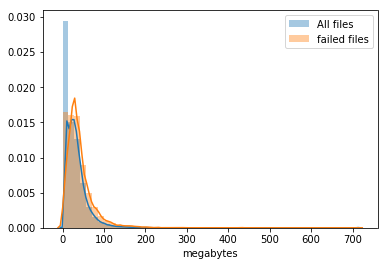

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
sns.distplot(aws_fastq_bytes['megabytes'], label='All files')
sns.distplot(aws_fastq_bytes_failed['megabytes'], label='failed files')
ax.legend()

In [33]:
aws_largest_file = pd.read_csv('/home/ubuntu/kmer-hashing/sourmash/maca/facs/aws_largest_file_per_sample_read.csv')
aws_largest_file['megabytes'] = aws_largest_file['filesize']/1e6
aws_largest_file.head()

,date,time,filesize,suffix,sample_id,read,s3_path,megabytes
0,2017-11-01,14:31:20,22145573,remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000126-3_39_F-1-1_S289/A1-B000126-3_39_F-1-1_S289_R1_001.fastq.gz,A1-B000126-3_39_F-1-1_S289,R1,s3://czbiohub-maca/remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000126-3_39_F-1-1_S289/A1-B000126-3_39_F-1-1_S289_R1_001.fastq.gz,22.145573
1,2017-11-01,16:41:03,23266148,remux_data/170925_A00111_0067_BH3M5YDMXX/rawdata/A1-B000126-3_39_F-1-1_S289/A1-B000126-3_39_F-1-1_S289_R2_001.fastq.gz,A1-B000126-3_39_F-1-1_S289,R2,s3://czbiohub-maca/remux_data/170925_A00111_0067_BH3M5YDMXX/rawdata/A1-B000126-3_39_F-1-1_S289/A1-B000126-3_39_F-1-1_S289_R2_001.fastq.gz,23.266148
2,2017-11-01,02:55:18,21310221,remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000127-3_38_F-1-1_S1/A1-B000127-3_38_F-1-1_S1_R1_001.fastq.gz,A1-B000127-3_38_F-1-1_S1,R1,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000127-3_38_F-1-1_S1/A1-B000127-3_38_F-1-1_S1_R1_001.fastq.gz,21.310221
3,2017-11-01,02:55:18,22202025,remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000127-3_38_F-1-1_S1/A1-B000127-3_38_F-1-1_S1_R2_001.fastq.gz,A1-B000127-3_38_F-1-1_S1,R2,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000127-3_38_F-1-1_S1/A1-B000127-3_38_F-1-1_S1_R2_001.fastq.gz,22.202025
4,2017-11-01,16:13:47,16167976,remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000167-3_56_F-1-1_S228/A1-B000167-3_56_F-1-1_S228_R1_001.fastq.gz,A1-B000167-3_56_F-1-1_S228,R1,s3://czbiohub-maca/remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000167-3_56_F-1-1_S228/A1-B000167-3_56_F-1-1_S228_R1_001.fastq.gz,16.167976


In [34]:
aws_largest_file_failed = aws_largest_file.query('sample_id in @failed_samples_logs.id')
print(aws_largest_file_failed.shape)
aws_largest_file_failed.head()

(6932, 8)


,date,time,filesize,suffix,sample_id,read,s3_path,megabytes
160,2017-10-31,23:50:27,61972501,remux_data/170910_A00111_0054_AH2HGWDMXX/rawdata/A1-MAA000560-3_10_M-1-1_S298/A1-MAA000560-3_10_M-1-1_S298_R1_001.fastq.gz,A1-MAA000560-3_10_M-1-1_S298,R1,s3://czbiohub-maca/remux_data/170910_A00111_0054_AH2HGWDMXX/rawdata/A1-MAA000560-3_10_M-1-1_S298/A1-MAA000560-3_10_M-1-1_S298_R1_001.fastq.gz,61.972501
161,2017-10-31,23:50:27,64906886,remux_data/170910_A00111_0054_AH2HGWDMXX/rawdata/A1-MAA000560-3_10_M-1-1_S298/A1-MAA000560-3_10_M-1-1_S298_R2_001.fastq.gz,A1-MAA000560-3_10_M-1-1_S298,R2,s3://czbiohub-maca/remux_data/170910_A00111_0054_AH2HGWDMXX/rawdata/A1-MAA000560-3_10_M-1-1_S298/A1-MAA000560-3_10_M-1-1_S298_R2_001.fastq.gz,64.906886
212,2017-10-31,19:31:51,25252295,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000776-3_10_M-1-1_S81/A1-MAA000776-3_10_M-1-1_S81_R1_001.fastq.gz,A1-MAA000776-3_10_M-1-1_S81,R1,s3://czbiohub-maca/remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000776-3_10_M-1-1_S81/A1-MAA000776-3_10_M-1-1_S81_R1_001.fastq.gz,25.252295
213,2017-10-31,19:31:51,26355542,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000776-3_10_M-1-1_S81/A1-MAA000776-3_10_M-1-1_S81_R2_001.fastq.gz,A1-MAA000776-3_10_M-1-1_S81,R2,s3://czbiohub-maca/remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000776-3_10_M-1-1_S81/A1-MAA000776-3_10_M-1-1_S81_R2_001.fastq.gz,26.355542
276,2017-11-01,20:14:17,29405786,remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000937-3_8_M-1-1_S119/A1-MAA000937-3_8_M-1-1_S119_R1_001.fastq.gz,A1-MAA000937-3_8_M-1-1_S119,R1,s3://czbiohub-maca/remux_data/170907_A00111_0051_BH2HWLDMXX/rawdata/A1-MAA000937-3_8_M-1-1_S119/A1-MAA000937-3_8_M-1-1_S119_R1_001.fastq.gz,29.405786


/home/ubuntu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


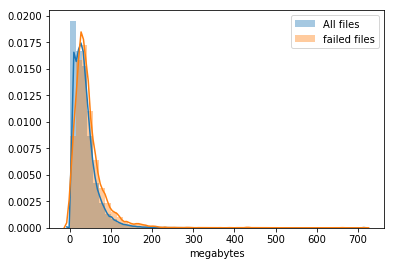

In [35]:
fig, ax = plt.subplots()
sns.distplot(aws_largest_file['megabytes'], label='All files')
sns.distplot(aws_largest_file_failed['megabytes'], label='failed files')
ax.legend()

## LUng cancer data

How many signatures were created?

In [36]:
! aws s3 ls s3://olgabot-maca/lung_cancer/sourmash/ | wc -l

247


How many samples are there?

In [37]:
!wc -l /home/ubuntu/kmer-hashing/sourmash/lung_cancer/samples.csv

5055 /home/ubuntu/kmer-hashing/sourmash/lung_cancer/samples.csv


In [47]:
! head samples.csv

id,read1,read2,sample_id,output_signature
A10_B000419_S34,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000419_S34/A10_B000419_S34_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000419_S34/A10_B000419_S34_R2_001.fastq.gz,A10_B000419_S34,s3://olgabot-maca/lung_cancer/sourmash/A10_B000419_S34.signature
A10_B000420_S82,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000420_S82/A10_B000420_S82_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000420_S82/A10_B000420_S82_R2_001.fastq.gz,A10_B000420_S82,s3://olgabot-maca/lung_cancer/sourmash/A10_B000420_S82.signature
A10_B002073_S166,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002073_S166/A10_B002073_S166_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002073_S166/A10_B002073_S166_R2_001.fastq.gz,A10_B002073_S166,s3://olgabot-maca/lung_cancer/sourmash/A10

In [38]:
cd ~/kmer-hashing/sourmash/lung_cancer/

/home/ubuntu/kmer-hashing/sourmash/lung_cancer


In [40]:
%%bash

aws s3 ls s3://olgabot-maca/lung_cancer/sourmash/ | cut -f 9 -d ' ' | cut -f 1 -d'.' > samples_with_signatures.txt
ls -lh | grep --fixed-strings --file samples_with_signatures.txt -v | grep log > failed_samples.txt

In [42]:
! wc -l failed_samples.txt

4808 failed_samples.txt


In [41]:
! head failed_samples.txt

-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B000419_S34
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B000420_S82
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B002073_S166
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B002078_S202
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B002095_S118
-rw------- 1 ubuntu ubuntu  261 Jun 13 17:30 log.A10_B002097_S250
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B003125_S262
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B003511_S214
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B003527_S130
-rw------- 1 ubuntu ubuntu 2.6K Jun 13 17:30 log.A10_B003528_S10


In [45]:
! ls  | grep --fixed-strings --file samples_with_signatures.txt -v | grep log | xargs tail -n 20 | head -n 50

==> log.A10_B000419_S34 <==
	error intern s3://czbiohub-seqbot/fastqs: resource does not exist: NotFound: Not Found
	status code: 404, request id: 471A934CE7C05F89, host id: uyaUdx7YY/gDGi5qESYfdhi9rU2070lrhRtHpkzNjTwAVyB6G8fI2OEIB9SXl4xfqAZ+TZ1aH0Q=
	/home/ubuntu/reflow-workflows/sourmash.rf:154:15
2018/06/13 00:49:09 total n=2 time=0s
	ident            n   ncache transfer runtime(m) cpu mem(GiB) disk(GiB) tmp(GiB)
	sourmash.Compute 1   0      0B                                         
	sourmash.r1      1   0      0B                                         
	
2018/06/13 00:49:09 marking run done after nonrecoverable error evaluation error:
	intern s3://czbiohub-seqbot/fastqs: resource does not exist: NotFound: Not Found
	status code: 404, request id: 471A934CE7C05F89, host id: uyaUdx7YY/gDGi5qESYfdhi9rU2070lrhRtHpkzNjTwAVyB6G8fI2OEIB9SXl4xfqAZ+TZ1aH0Q=
2018/06/13 00:49:09 run A10_B000419_S34: state: done error evaluation error:
	intern s3://czbiohub-seqbot/fastqs: resource does not e

In [46]:
! ls  | grep --fixed-strings --file samples_with_signatures.txt -v | grep log | xargs head -n 20 | head -n 50

==> log.A10_B000419_S34 <==
2018/06/13 00:48:50 accepted alloc ec2-18-237-24-105.us-west-2.compute.amazonaws.com:9000/806b421692e2ac46
2018/06/13 00:49:08 run A10_B000419_S34: state: eval alloc ec2-18-237-24-105.us-west-2.compute.amazonaws.com:9000/806b421692e2ac46
2018/06/13 00:49:08 turning caching off because assoc and repository are not configured
2018/06/13 00:49:08 evaluating with configuration: executor *client.clientAlloc transferer *repository.Manager flags cacheextern,nocache,nogc,norecomputeempty,topdown flowconfig hashv2 cachelookuptimeout 1m0s
2018/06/13 00:49:08  ->  sourmash.r1  c4f18df3 run  intern s3://czbiohub-seqbot/fastqs
2018/06/13 00:49:08 sourmash.r1 c4f18df3 /home/ubuntu/reflow-workflows/sourmash.rf:154:15:
	sha256:c4f18df3ed8e78ff3397810faf613049c7bf75852581be97f315d53c9d71b5ef
2018/06/13 00:49:09  <-  sourmash.r1  c4f18df3 err  intern 0s 0B
	error intern s3://czbiohub-seqbot/fastqs: resource does not exist: NotFound: Not Found
	status code: 404, request id: 47